
Random Forest Classifier Results:
Accuracy: 0.9740
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[966   0]
 [ 29 120]]


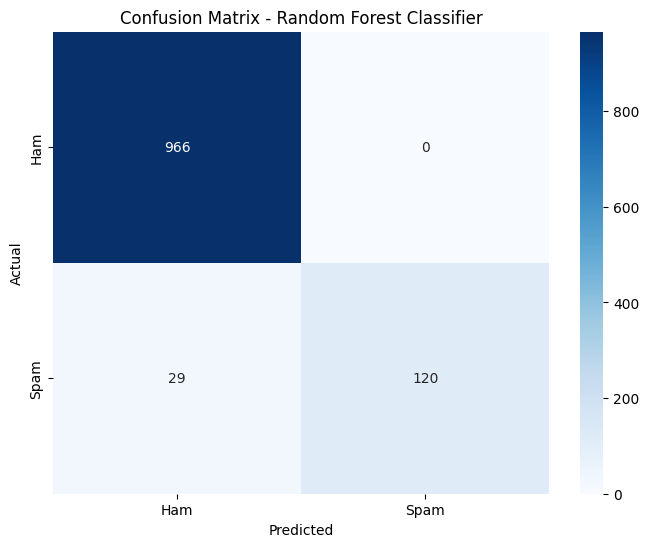

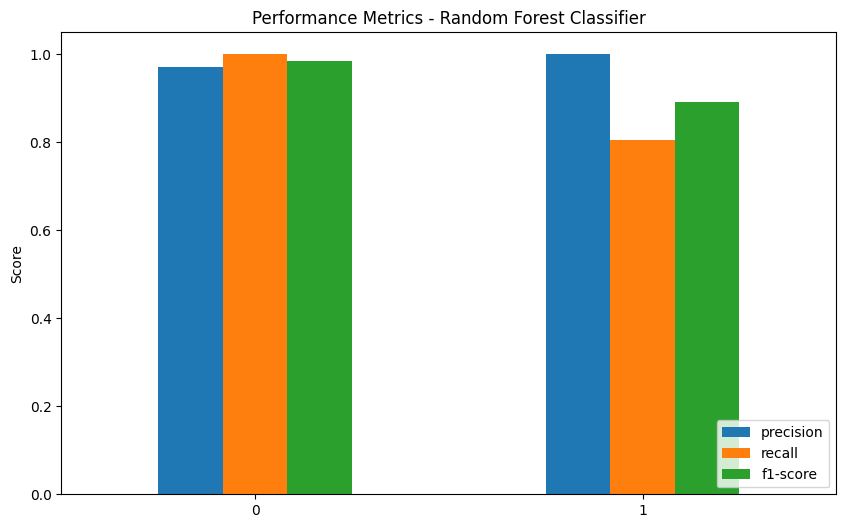

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    """
    Load and preprocess the dataset.
    :param file_path: Path to the dataset file.
    :return: Preprocessed features (X) and target (y).
    """
    # Load dataset
    data = pd.read_csv(file_path, encoding='latin1')  # Adjust encoding if needed
    
    # Drop missing values
    data.dropna(inplace=True)
    
    # Encode labels
    label_encoder = LabelEncoder()
    data['Category_encoded'] = label_encoder.fit_transform(data['Category'])
    
    return data['Message'], data['Category_encoded']

# Train and test splitting
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Split the data into training and testing sets.
    :param X: Features.
    :param y: Labels.
    :param test_size: Proportion of test set.
    :param random_state: Random seed for reproducibility.
    :return: X_train, X_test, y_train, y_test.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

# TF-IDF Vectorization
def vectorize_data(X_train, X_test, max_features=5000):
    """
    Transform text data using TF-IDF vectorization.
    :param X_train: Training features.
    :param X_test: Testing features.
    :param max_features: Maximum number of features for TF-IDF.
    :return: Transformed X_train and X_test.
    """
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf

# Function to train Random Forest model
def train_random_forest(X_train, y_train, n_estimators=100, random_state=42):
    """
    Train a Random Forest Classifier.
    :param X_train: Training features.
    :param y_train: Training labels.
    :param n_estimators: Number of trees in the forest.
    :param random_state: Random seed for reproducibility.
    :return: Trained Random Forest model.
    """
    model = RandomForestClassifier(class_weight='balanced', random_state=random_state, n_estimators=n_estimators)
    model.fit(X_train, y_train)
    return model

# Function to evaluate and visualize the model
def evaluate_and_visualize_model(model, X_test, y_test, model_name):
    """
    Evaluate and visualize the Random Forest Classifier performance.
    :param model: Trained model.
    :param X_test: Testing features.
    :param y_test: True labels.
    :param model_name: Name of the model for visualization titles.
    """
    y_pred = model.predict(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(conf_matrix)

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Visualize precision, recall, F1-score
    metrics_df = pd.DataFrame(report).transpose().iloc[:2, :3]  # Precision, Recall, F1-Score for classes
    metrics_df.plot(kind='bar', figsize=(10, 6), title=f"Performance Metrics - {model_name}")
    plt.xticks(rotation=0)
    plt.ylabel("Score")
    plt.legend(loc='lower right')
    plt.show()

# Main Random Forest Workflow
def main_random_forest_workflow(file_path):
    """
    Complete workflow for loading, processing, training, and evaluating Random Forest Classifier.
    :param file_path: Path to the dataset file.
    """
    # Step 1: Load and preprocess data
    X, y = load_and_preprocess_data(file_path)
    
    # Step 2: Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Step 3: Vectorize text data
    X_train_tfidf, X_test_tfidf = vectorize_data(X_train, X_test)
    
    # Step 4: Train Random Forest Classifier
    random_forest_model = train_random_forest(X_train_tfidf, y_train)
    
    # Step 5: Evaluate and visualize results
    evaluate_and_visualize_model(random_forest_model, X_test_tfidf, y_test, "Random Forest Classifier")

# Run the Random Forest Workflow
file_path = "spam.csv"  # Replace with your actual file path
main_random_forest_workflow(file_path)
